## Automatic Ticket Assignment
One of the key activities of any IT function is to ensure there is no
impact to the Business operations. <b>IT leverages Incident Management process to achieve the
above Objective.</b> An incident is something that is unplanned interruption to an IT service or
reduction in the quality of an IT service that affects the Users and the Business. <b><i>The main goal
of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact.</i></b>

In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have access to ticketing systems, and from the integrated monitoring
systems and tools. <b>Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources.</b>

<i> Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.</i>
#### <b>Business Domain Value:</b> 
In the support process, incoming incidents are analyzed and assessed by organization’s support teams to fulfill the request. In many organizations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings.

Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve the incidents. Around ~56%
of incidents are resolved by Functional / L3 teams. Incase if vendor support is needed, they will reach out for their support towards incident closure.

L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams. During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service.

## Objective:
### Build Multi-Class classifier that can classify the tickets by analysing text.###
Guided by powerful AI techniques that can classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks.
### Milestones
1. Milestone 1: Pre-Processing, Data Visualisation and EDA
  1. Exploring the given Data files
  2. Understanding the structure of data
  3. Missing points in data
  4. Finding inconsistencies in the data
  5. Visualizing different patterns
  6. Visualizing different text features
  7. Dealing with missing values
  8. Text preprocessing
  9. Creating word vocabulary from the corpus of report text data
  10. Creating tokens as required

2. Milestone 2: Model Building
  1. Building a model architecture which can classify.
  2. Trying different model architectures by researching state of the art for similar tasks.
  3. Train the model
  4. To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch.

3. Milestone 3: Test the Model, Fine-tuning and Repeat
  1. Test the model and report as per evaluation metrics
  2. Try different models
  3. Try different evaluation metrics
  4. Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc..for these models to fine-tune them
  5. Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric.


#### Imports and Configuration

We will be cloning the gihub repo as it has all the necessary dependencies for our project. and we install the dependencies using a requirements file.
**``!pip install ftfy wordcloud goslate spacy plotly cufflinks``**<br/>
**``conda install -c conda-forge ftfy wordcloud goslate spacy plotly cufflinks``**

In [5]:
#@title ####Cloning Github Repo
%%capture installation-output
import os
import shutil
from getpass import getpass

if ("Automated-Ticketing-System" not in os.listdir()):
  username = input('Github username: ')
  password = getpass('Github password: ')
  os.environ['GITHUB_AUTH'] = username + ':' + password

  !git clone https://$GITHUB_AUTH@github.com/Gnommer/Automated-Ticketing-System --branch submission
  os.chdir("Automated-Ticketing-System")
  !pip3 install -r requirements.txt
  !wget -O /tmp/lid.176.bin https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
  !python3 -m spacy download en_core_web_sm
  import warnings
  warnings.filterwarnings("ignore")
else:
  os.chdir("Automated-Ticketing-System")

Github username: Gnommer
Github password: ··········


In [37]:
# Utilities
from time import time
from PIL import Image
from zipfile import ZipFile
import os, sys, itertools, re
import warnings, pickle, string
from ftfy import fix_encoding, fix_text, badness
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Translation APIs
from goslate import Goslate # Provided by Google

# Numerical calculation
import numpy as np

# Data Handling
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

# Sequential Modeling
import keras.backend as K
from keras.datasets import imdb
from keras.models import Sequential, Model
from keras.layers.merge import Concatenate
from keras.layers import Input, Dropout, Flatten, Dense, Embedding, LSTM, GRU
from keras.layers import BatchNormalization, TimeDistributed, Conv1D, MaxPooling1D
from keras.constraints import max_norm, unit_norm
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Traditional Modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Tools & Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# NLP toolkits
import spacy
import nltk
from nltk import tokenize

import pandas as pd
from Pipelines import NLP_Pipeline


import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
pipeline1 = NLP_Pipeline(file_path="Dataset/Dataset.xlsx")

#### Loading Dataset
Load the dataset into a Pandas dataframe called df and check the head of the dataset here we will use the Abstraction for NLP_Pipeline written in Github Repo

In [0]:
df = pipeline1.read_dataset()

In [15]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,0
4,skype error,skype error,owlgqjme qhcozdfx,0


In [16]:
df.tail()

,Short description,Description,Caller,Assignment group
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,62
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,49


**Comments**
* To take a closer look at the data, pandas library provides **“.head()”** function which returns first five observations and **“.tail()”** function which returns last five observations of the data set.
* Here we can see there are lots of escape sequence characters and mojibake characters so seems the encoding is not matching with the dataset loaded
* we have removed the GRP_ from the **response_vector** so its more easier to sort the columns or aggregate the data according to the Assignment Group


### Inspect the Dataset
The dataset is divided into two parts, namely, **feature matrix** and the **response vector**.

- Feature matrix contains all the vectors(rows) of dataset in which each vector consists of the value of **dependent features**. In above dataset, features are *Short description*, *Description* and *Caller*.
- Response vector contains the value of **class variable**(prediction or output) for each row of feature matrix. In above dataset, the class variable name is *Assignment group*.

In [18]:
# Shape of the Dataset
print('No of rows:\033[1m', df.shape[0], '\033[0m')
print('No of cols:\033[1m', df.shape[1], '\033[0m')

No of rows: 8500 
No of cols: 4 


In [19]:
# Preliminary Info on the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 265.8+ KB


In [25]:
# Summary Statistics of the Dataset
df.describe(include='object')

,Short description,Description,Caller
count,8492,8499,8500
unique,7481,7817,2950
top,password reset,the,bpctwhsn kzqsbmtp
freq,38,56,810


In [29]:
# Check the Short description of tickets having Description as only 'the'
df[df.Description == 'the'].head()

,Short description,Description,Caller,Assignment group
1049,reset passwords for soldfnbq uhnbsvqd using pa...,the,soldfnbq uhnbsvqd,17
1054,reset passwords for fygrwuna gomcekzi using pa...,the,fygrwuna gomcekzi,17
1144,reset passwords for wvdxnkhf jirecvta using pa...,the,wvdxnkhf jirecvta,17
1184,reset passwords for pxvjczdt kizsjfpq using pa...,the,pxvjczdt kizsjfpq,17
1292,reset passwords for cubdsrml znewqgop using pa...,the,cubdsrml znewqgop,17


In [30]:
# Find out the null value counts in each column
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

**Observations:**
- The dataset comprises of **8500 rows** and **4 columns**
- All columns are of type object containing textual information except for Assignment Group which is Integer
- There are **8 null/missing values** present in the Short description and **1 null/missing values** present in the description column
- **Password reset** is one of the most occuring tickets which reflects in the Short description column.
- The top occuring Description in the dataset is only the text **'the'**, which absolutely doesn't make any sense. hence by looking at the Short description of such rows reveals that these are also a category of Password reset.




#### Handling Missing Values

In [31]:
# Let's look at the rows with Null values
df[pd.isnull(df).any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,0


In [32]:
# Null Replacement
df.fillna(str(), inplace=True)
df[pd.isnull(df).any(axis=1)]

,Short description,Description,Caller,Assignment group


In [34]:
# verify the replacement
df.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

**Comments**:
- We have various ways of treating the NULL/Missing values in the dataset such as 
    - Replacing them with empty string 
    - Replacing them with some default values
    - Duplicating the Short description and Description values wherever one of them is Null
    - Dropping the records with null/missing values completely.
- We're not choosing to drop any record as we don't want to loose any information. And as we're going to concatenate the Short description and Description columns for each record while feeding them into NLP, we neither want to pollute the data by introducing any default values nor bias it by duplicating the description colomns.
- Hence our NULL/Missing value treatment replaces the NaN cells with just empty string.


#### Mojibake Characters
[Mojibake](https://en.wikipedia.org/wiki/Mojibake) is the garbled text that is the result of text being decoded using an unintended character encoding. The result is a systematic replacement of symbols with completely unrelated ones, often from a different writing system.<br/>
This display may include the generic replacement character ("�") in places where the binary representation is considered invalid. A replacement can also involve multiple consecutive symbols, as viewed in one encoding, when the same binary code constitutes one symbol in the other encoding. This is either because of differing constant length encoding (as in Asian 16-bit encodings vs European 8-bit encodings), or the use of variable length encodings (notably UTF-8 and UTF-16). Few such Mojibakes are **¶**, **ç**, **å**, **€**, **æ**, **œ**, **º**, **‡**, **¼**, **¥** etc.

As we're dealing with Natural Language and the source of the data is unknown to us, let's run the encoding check to figure out if the dataset is Mojibake impacted.

The library **ftfy** (Fixes Text For You) has a greater ability to detect, fix and deal with such Mojibakes. It fixes Unicode that’s broken in various ways. The goal of ftfy is to take in bad Unicode and output good Unicode.

Installation:<br/>
using pypi: **`!pip install ftfy`**<br/>
using conda: **`conda install -c conda-forge ftfy`**

In [38]:
# Write a function to apply to the dataset to detect Mojibakes
def is_mojibake_impacted(text):
    if not badness.sequence_weirdness(text):
        # nothing weird, should be okay
        return True
    try:
        text.encode('sloppy-windows-1252')
    except UnicodeEncodeError:
        # Not CP-1252 encodable, probably fine
        return True
    else:
        # Encodable as CP-1252, Mojibake alert level high
        return False
    
# Check the dataset for mojibake impact
df[~df.iloc[:,:-1].applymap(is_mojibake_impacted).all(1)]

,Short description,Description,Caller,Assignment group
99,password expiry tomorrow,\n\nreceived from: ecprjbod.litmjwsy@gmail.com...,ecprjbod litmjwsy,0
116,server issues,\r\n\r\nreceived from: bgqpotek.cuxakvml@gmail...,bgqpotek cuxakvml,0
124,mobile device activation,"from: tvcdfqgp nrbcqwgj \nsent: friday, octobe...",tvcdfqgp nrbcqwgj,0
164,æ’¤å›ž: ticket_no1564867 -- comments added,\n\nreceived from: abcdri@company.com\n\nwindy...,tycludks cjofwigv,0
170,[urgent!!] delivery note creation request!!,\n\nreceived from: fbvpcytz.nokypgvx@gmail.com...,fbvpcytz nokypgvx,18
...,...,...,...,...
8470,please review your recent ticketing_tool ticke...,"from: mikhghytr wafglhdrhjop \nsent: thursday,...",azxhejvq fyemlavd,16
8471,ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥,to å°è´ºï¼Œæ—©ä¸Šç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥,xqyjztnm onfusvlz,30
8480,customer group enhanced field,\r\n\r\nreceived from: nlearzwi.ukdzstwi@gmail...,nlearzwi ukdzstwi,9
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,62


In [40]:
# Take an example of row# 8471 Short Desc and fix it
print('Grabled text: \033[1m%s\033[0m\nFixed text: \033[1m%s\033[0m' % (df['Short description'][8471], 
                                                                        fix_text(df['Short description'][8471])))

# List all mojibakes defined in ftfy library
print('\nMojibake Symbol RegEx:\n', badness.MOJIBAKE_SYMBOL_RE.pattern)

Grabled text: ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥
Fixed text: 电脑开机开不出来

Mojibake Symbol RegEx:
 [ÂÃĂ][-€ƒ‚„†‡ˆ‰‹Œ“•˜œŸ¡¢£¤¥¦§¨ª«¬¯°±²³µ¶·¸¹º¼½¾¿ˇ˘˝]|[ÂÃĂ][›»‘”´©™]\w|[¬√][ÄÅÇÉÑÖÜáàâäãåçéèêëíìîïñúùûü†¢£§¶ß®©™≠ÆØ¥ªæø≤≥]|\w√[±∂]\w|[ðđ][Ÿ]|â€|вЂ[љћ¦°№™ќ“”]


In [43]:
# Sanitize the dataset from Mojibakes
df['Short description'] = df['Short description'].apply(fix_text)
df['Description'] = df['Description'].apply(fix_text)

# Visualize that row# 8471
df.iloc[8471,:]

Short description             电脑开机开不出来
Description           to 小贺,早上电脑开机开不出来
Caller               xqyjztnm onfusvlz
Assignment group                    30
Name: 8471, dtype: object

In [44]:
df.iloc[8498,:]

Short description                         machine não está funcionando
Description          i am unable to access the machine utilities to...
Caller                                               ufawcgob aowhxjky
Assignment group                                                    62
Name: 8498, dtype: object

In [0]:
# Serialize the mojibake treated dataset
df.to_csv('Dataset/mojibake_treated.csv', index=False, encoding='utf_8_sig')
with open('Dataset/mojibake_treated.pkl', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
df = pd.read_csv("Dataset/mojibake_treated.csv")

**Comments:**
- `badness.sequence_weirdness()` determines how often a text has unexpected characters or sequences of characters. This metric is used to disambiguate when text should be re-decoded or left as is.
- We're successfuly able to get the grabled characters back into their original form using **ftfy.fix_text()``**, however it is observed that the row# 8471 is not English but Mandarine.
- So the data in our hand is multilingual and it is quite not possible to derive embeddings for mix of multiple languages. We're going to translate the entire dataset into a single language of English.

#### Language Translation (Goslate: Free Google Translate API)
Goslate is an open source python library that implemented Google Translate API. This uses the [Google Translate Ajax API](https://translate.google.com/) to make calls to such methods as detect and translate. It is choosen over another library Googletrans from Google as Goslate is developed to bypass the ticketing mechanism to prevent simple crawler program to access the Ajax API. Hence Goslate with multiple service urls is able to translate the entire dataset in very few iterations without blocking the user's IP address.

Installation:<br/>
using pypi: **`!pip install goslate`**<br/>
using conda: **`conda install -c conda-forge goslate`**

Servicce Urls used:
**``translate.google.com``**, **``translate.google.com.au``**, **``translate.google.com.ar``**, **``translate.google.co.kr``**, **``translate.google.co.in``**, **``translate.google.co.jp``**, **``translate.google.at``**, **``translate.google.de``**, **``translate.google.ru``**, **``translate.google.ch``**, **``translate.google.fr``**, **``translate.google.es``**, **``translate.google.ae``**

In [47]:
# Define and construct the service urls
svc_domains = ['.com','.com.au','.com.ar','.co.kr','.co.in','.co.jp','.at','.de','.ru','.ch','.fr','.es','.ae']
svc_urls = ['http://translate.google' + domain for domain in svc_domains]

# Take an example of row 8471 Short Desc and fix it
gs = Goslate(service_urls=svc_urls)
trans_8471 = gs.translate(df['Short description'][8471], target_language='en', source_language='auto')
print('Original text: \033[1m%s\033[0m\nFixed text: \033[1m%s\033[0m' % (df['Short description'][8471], trans_8471))

Original text: 电脑开机开不出来
Fixed text: Boot the computer does not really come out


In [65]:
import fasttext
PRETRAINED_MODEL_PATH = '/tmp/lid.176.bin'
lang_model = fasttext.load_model(PRETRAINED_MODEL_PATH)
from pycountry import languages

def detect_language(text):
    # try:
    predictions = lang_model.predict(text)
    lang = predictions[0][0].split("__")[-1]
    score = predictions[1][0]
    name = languages.get(alpha_2=lang).name
    return (name, lang, score)
    # except Exception as e:
    #     return ("NA", "NA", 0)

detect_language(df.iloc[8471, 0])

('Chinese', 'zh', 0.9220722913742065)

In [66]:
svc_domains = ['.com','.com.au','.com.ar','.co.kr','.co.in','.co.jp','.at','.de','.ru','.ch','.fr','.es','.ae']
svc_urls = ['http://translate.google' + domain for domain in svc_domains]

# List of column data to consider for translation
trans_cols = ['Short description','Description']

# Add a new column to store the detected language
df.insert(loc=2, column='Language', value=np.nan, allow_duplicates=True)

for idx in range(df.shape[0]):
    # Instantiate Goslate class in each iteration
    gs = Goslate(service_urls=svc_urls)
    lang = gs.detect(' '.join(df.loc[idx, trans_cols].tolist()))
    row_iter = gs.translate(df.loc[idx, trans_cols].tolist(), 
                            target_language='en', 
                            source_language='auto')
    df.loc[idx, trans_cols] = list(row_iter)
    
df.Language = lang
df.head()

HTTPError: ignored

In [50]:
df

,Short description,Description,Language,Language,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,NaN,NaN,spxjnwir pjlcoqds,0
1,outlook,received from: hmjdrvpb.komuaywn@gmail.com\n\n...,NaN,NaN,hmjdrvpb komuaywn,0
2,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com\n\n...,NaN,NaN,eylqgodm ybqkwiam,0
3,unable to access hr_tool page,unable to access hr_tool page,NaN,NaN,xbkucsvz gcpydteq,0
4,skype error,skype error,NaN,NaN,owlgqjme qhcozdfx,0
...,...,...,...,...,...,...
8495,emails not coming in from zz mail,\n\nreceived from: avglmrts.vhqmtiua@gmail.com...,NaN,NaN,avglmrts vhqmtiua,29
8496,telephony_software issue,telephony_software issue,NaN,NaN,rbozivdq gmlhrtvp,0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,NaN,NaN,oybwdsgx oxyhwrfz,0
8498,machine não está funcionando,i am unable to access the machine utilities to...,NaN,NaN,ufawcgob aowhxjky,62


#### Distributions of the labels

There are more Group 0 tickets than others.

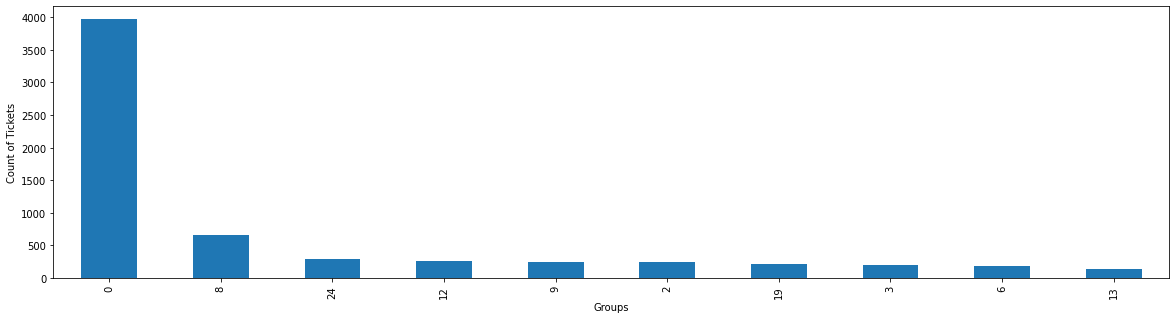

In [0]:
plt.figure(figsize=(20, 5))
df["Assignment group"].value_counts()[:10].plot(kind='bar')
plt.yscale('linear')
plt.ylabel("Count of Tickets")
plt.xlabel("Groups")
plt.show()

There are clear bins formed for the complaints when the issues are explored in a log scale. Group 0 is the highest

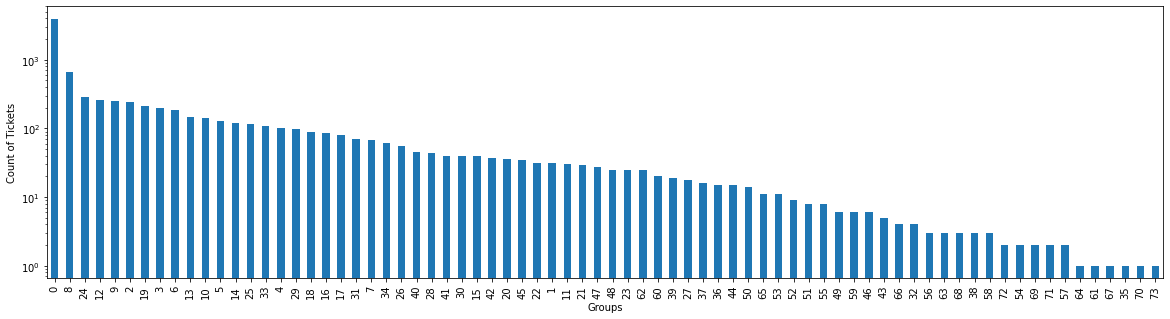

In [0]:
plt.figure(figsize=(20, 5))
df["Assignment group"].value_counts().plot(kind='bar')
plt.yscale('log')
plt.ylabel("Count of Tickets")
plt.xlabel("Groups")
plt.show()

#### Presence of different languages

As we can see below there are tickets which are not completely in english. this ticket is in German. so we need to write a strategy to find the languages of the tickets based on the description and short description.

In [0]:
df[df.index == 255]

,Short description,Description,Caller,Assignment group
255,probleme mit laufwerk z: \laeusvjo fvaihgpx,probleme mit laufwerk z: \laeusvjo fvaihgpx,laeusvjo fvaihgpx,24


In [0]:
df = pipeline1.preprocess_data()

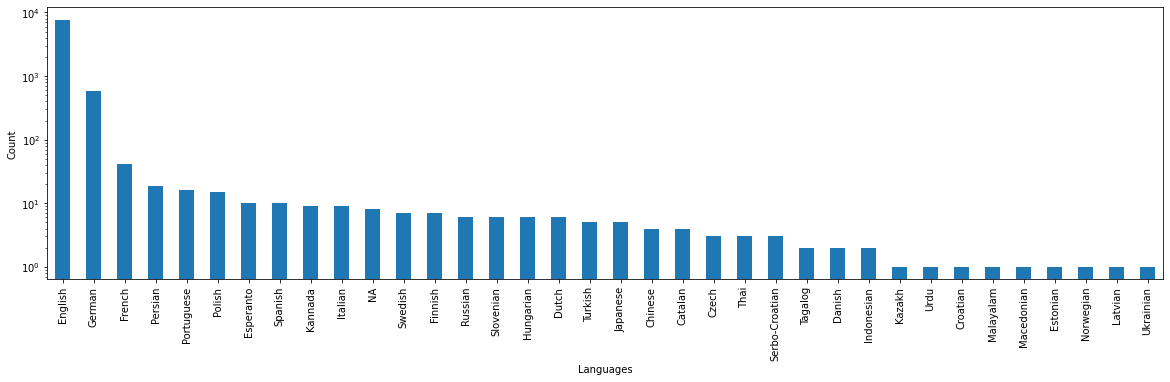

In [0]:
plt.figure(figsize=(20, 5))
df["des_lang"].value_counts().plot(kind='bar')
plt.yscale('log')
plt.ylabel("Count")
plt.xlabel("Languages")
plt.show()

In [0]:
print(df["des_lang"].value_counts().index[0], ": ", df["des_lang"].value_counts()[0])

English :  7692


In [0]:
print("Non English Tickets: ", len(df) - df["des_lang"].value_counts()[0])

Non English Tickets:  799


more english tickets are present when compared to other languages

#### Preprocessed Dataframe

In [0]:
df.head()

,Short description,Description,Caller,Assignment group,clean_des,clean_sdes,des_lang,sdes_lang,des_has_email,sdes_has_email,des_has_domain,sdes_has_domain,des_has_url,sdes_has_url
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,0,"(verify, user, detail, employee, manager, chec...","(login, issue)",English,English,False,False,False,False,False,False
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,0,"(receive, hmjdrvpb.komuaywn@gmail.com, hello, ...",(outlook),English,English,True,False,True,False,False,False
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,0,"(receive, eylqgodm.ybqkwiam@gmail.com, hello, ...","(not, log, vpn)",English,English,True,False,True,False,False,False
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,0,"(unable, access, hr, tool, page)","(unable, access, hr, tool, page)",English,English,False,False,False,False,False,False
4,skype error,skype error,owlgqjme qhcozdfx,0,"(skype, error)","(skype, error)",Japanese,Japanese,False,False,False,False,False,False
